# CS 106A Autumn 2020 Section 9

At a recent night-time marathon (<a href="https://worldsmarathons.com/guides/nocturnal-racing">it's a thing</a>), there was a power outage at the finishline of the roughly 40,000 meter race. All of the lights went out and the timers all turned off. Nobody saw who crossed the finish line first, and the runners did not know how fast they ran. 

Fortunately, each runner was wearing a timing chip. The chips were unaffected by the blackout. Each chip recorded some set of random distances (in meters from the starting point) at random intervals (in seconds) and uploaded this data to the cloud. Unfortunately, the data is was not only recorded randomly, but uploaded in a random order as well, making it very difficult to interpret. Luckily, you're a python wizard and can help us determine who won the race! 

#### To run the code in a block, select the block and press shift->enter. 

## Problem 1

Your first task is to parse through the file `times_and_distances.csv` and store the data in a meaningful way. Each line in the file is formatted as follows: `name,time,distance`, where name is the name of the runner, time is the time elasped in seconds since the start of the race, and distance is the runner's distance in meters from the starting point at that time. 

Create a dictionary that maps names to a list of tuples, with the first element of the tuple being the 
time and the second element being the runner's distance at that time.

In [1]:
import csv
# Parse through this file
filename = "times_and_distances.csv"
# Create a dictionary mapping names to tuples of (time,heart_rate)
name_to_position = {}

with open(filename) as f:
    for line in f:
        data = line.split(',')
        name = data[0]
        time = float(data[1])
        distance = float(data[2])
        if name not in name_to_position:
            name_to_position[name] = []
        name_to_position[name].append((time, distance))

## Problem 2

Now that we have a dictionary containing the relevant data, it's time to organize it. Sort each list of tuples by the time elapsed, which is stored in the first element of each tuple. Don't create a new dictionary - just update the current dictionary's keys to be associated with the new sorted lists, so `Alice` in `name_to_positions` should now map to a list of tuples sorted by the time elapsed. 

Do you need to use a custom lambda sort to sort the tuples by time? Why or why not?

After sorting, find and print the maximum distance and corresponding for each person using a call to `max` with a lambda function. This should already give us a hint as to who won the race!

In [2]:
def get_time(time_and_dist):
    return time_and_dist[0]

def get_dist(time_and_dist):
    return time_and_dist[1]

# Sort each list of tuples by time elapsed
for name in name_to_position:
    name_to_position[name].sort(key=get_time)

# Find and print out the maximum distance for each person using a call to max() with a provided lambda
for name in name_to_position:
    max_dist = max(name_to_position[name], key=get_dist)[1]
    print(f"{name}: {max_dist:.2f}")

alice: 39920.93
bob: 37992.60
diana: 34997.17
charlie: 35927.68


## Problem 3

Great! Everything's looking in order. Now, create a new list for each of the four runners that consists of just the distances in chronological order (i.e. the same order they're in in `name_to_positions`). You might want to implement a function to help you decompose this work. Modify the provided `alice_distances`, `bob_distances`, etc., to be your final lists. 

In [3]:
def get_distances(name):
    return [dist for (time, dist) in name_to_position[name]]

alice_distances = get_distances("alice")
bob_distances = get_distances("bob")
charlie_distances = get_distances("charlie")
diana_distances = get_distances("diana")

## Problem 4

Finally, we can graph our resulting lists to determine the winner once and for all! We'll be using a submodule called `pyplot`, located inside the `matplotlib` module, that allows us to quickly and easily draw graphs. Specifically, we want to draw a line for each of the 4 runners, showing their distances over time to see if there are any clues in the graphs.

Some helpful functions include the following: 
 * **`pyplot.figure(figsize=(width,height))`**
     * This function lets you specify the width and height of the graph. You should specify your desired width and height inside with a tuple passed in to the figsize argument, as shown above. A good width and height to start out with would be 10 and 8!
 * **`pyplot.plot(values, label=name, color=desired_color)`**
     * This function actually places `values` in a list on the plot. You can specify a label for each line (for example, the name of the person) as well as a desired color (`"red"`, `"green"`, `"blue"`, etc). Calling this function multiple times with different vales adds additional lines to the graph, without removing previously-added ones.
 * **`pyplot.xlabel(xlabel) and pyplot.ylabel(ylabel)`**
     * Sets the x and y labels of the graph to the desired string.
 * **`pyplot.title(title)`**
     * Titles the graph with a title of your choosing.
 * **`pyplot.legend()`**
     * Shows the legend based on the labels specified in plot().
 * **`pyplot.show()`**
     * Actually displays the graph. It won't show up otherwise - everything else is just setting it up, and this is the command that shows it!
  
Play around with different parameters and make a great looking graph! If you'd like to see a list of *all* functions in the module, you can find them [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html).

### Note: You may need to run this twice if you don't see anything the first time!
### To make the graph fit the page and not scroll, click "cell->current outputs->toggle scrolling"


<Figure size 432x288 with 0 Axes>

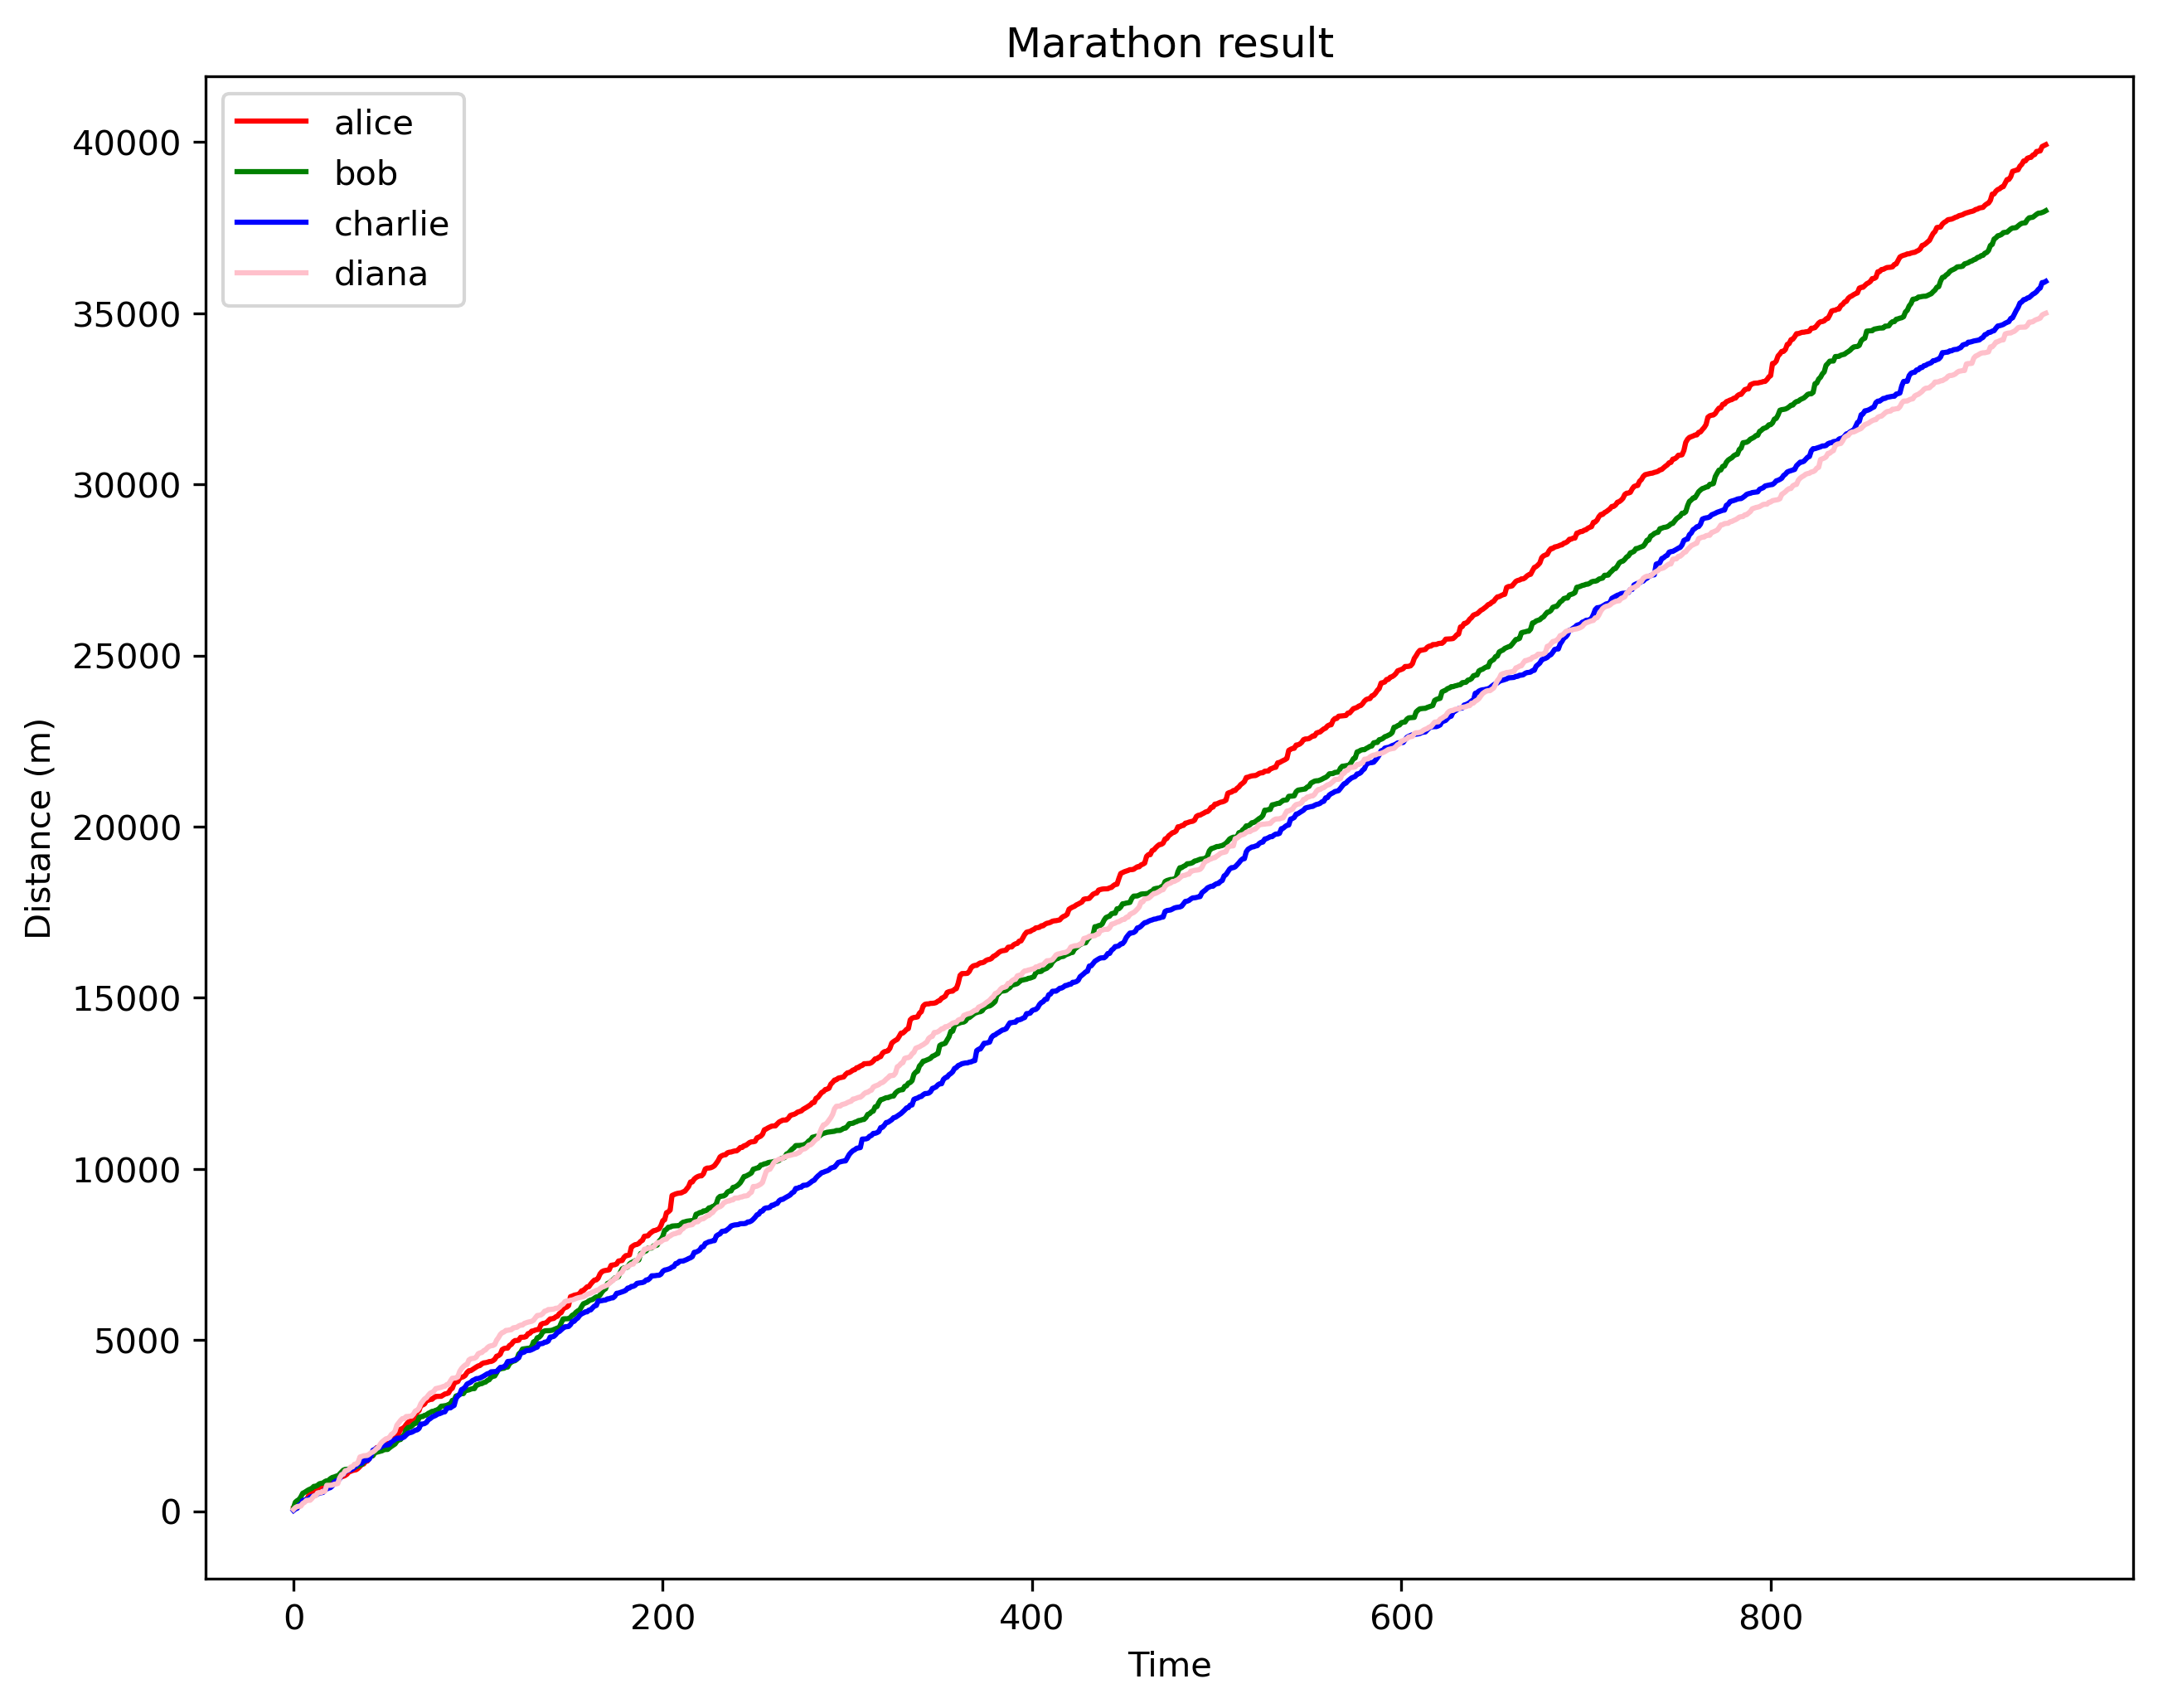

In [4]:
from matplotlib import pyplot
pyplot.clf() # make a blank plot. Don't remove this line

# Plot the graphs! If the graph is too big and you need to scroll,
# to make the graph fit the page and not scroll, 
# click "cell->current outputs->toggle scrolling" in the menu above.

pyplot.figure(figsize=(10, 8), dpi=300)
pyplot.plot(alice_distances, label="alice", color="red")
pyplot.plot(bob_distances, label="bob", color="green")
pyplot.plot(charlie_distances, label="charlie", color="blue")
pyplot.plot(diana_distances, label="diana", color="pink")

pyplot.xlabel("Time")
pyplot.ylabel("Distance (m)")
pyplot.title("Marathon result")
pyplot.legend()
pyplot.show()

Alice won the race and Diana lost the race!